In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.image as mpimg
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [13]:
train_visible_dir = os.path.join(r'C:\Users\heeke\Desktop\ieeepaper\Bone Suppression\Train\Bone Visible')


train_invisible_dir = os.path.join(r'C:\Users\heeke\Desktop\ieeepaper\Bone Suppression\Train\Bone Not visible')


test_visible_dir = os.path.join(r'C:\Users\heeke\Desktop\ieeepaper\Bone Suppression\Test\Bone Visible')


test_invisible_dir = os.path.join(r'C:\Users\heeke\Desktop\ieeepaper\Bone Suppression\Train\Bone Visible')

In [14]:
train_visible_images = os.listdir(train_visible_dir)

train_invisible_images = os.listdir(train_invisible_dir)

test_visible_images = os.listdir(test_visible_dir)

test_invisible_images = os.listdir(test_invisible_dir)

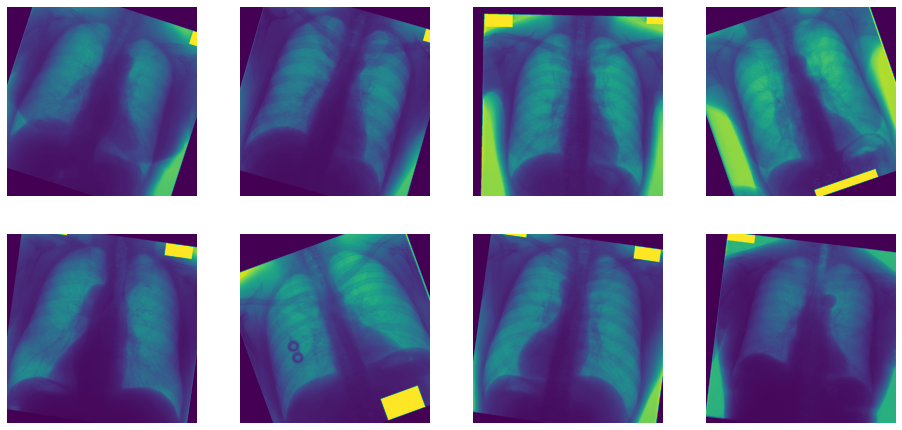

In [22]:
%matplotlib inline


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_visible_pix = [os.path.join(train_visible_dir, fname) 
                for fname in train_visible_images[pic_index-8:pic_index]]
next_invisible_pix = [os.path.join(train_invisible_dir, fname) 
                for fname in train_invisible_images[pic_index-8:pic_index]]

for i, img_path in enumerate(next_visible_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
#     print(img.shape)
    plt.imshow(img)

plt.show()

In [23]:
print(len(train_visible_images))
print(len(test_visible_images))

4080
241


In [24]:
model = tf.keras.models.Sequential([
    
    
    tf.keras.layers.Conv2D(32 , (3,3), input_shape = (64,64, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation ='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [26]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# train_data_gen= ImageDataGenerator(rescale = 1/255)



train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale= 1/255)

train_generator = train_data_gen.flow_from_directory(
    r'C:\Users\heeke\Desktop\ieeepaper\Bone Suppression\Train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)


test_generator = test_data_gen.flow_from_directory(
    r'C:\Users\heeke\Desktop\ieeepaper\Bone Suppression\Test',
    target_size = (64,64),
    batch_size = 16,
    class_mode = 'binary',
    
)

Found 8160 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [28]:
model.fit(train_generator,
        steps_per_epoch=int(8160/32),
        epochs=6,
        validation_data=test_generator,
        validation_steps=int(482/16))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 255 steps, validate for 30 steps
Epoch 1/6
255/255 [==============================] - 215s 844ms/step - loss: 0.6688 - accuracy: 0.5885 - val_loss: 0.4950 - val_accuracy: 0.9187
Epoch 2/6
255/255 [==============================] - 201s 787ms/step - loss: 0.5999 - accuracy: 0.6820 - val_loss: 0.4351 - val_accuracy: 0.8562
Epoch 3/6
255/255 [==============================] - 194s 762ms/step - loss: 0.5479 - accuracy: 0.7140 - val_loss: 0.3161 - val_accuracy: 0.9208
Epoch 4/6
255/255 [==============================] - 215s 843ms/step - loss: 0.4956 - accuracy: 0.7531 - val_loss: 0.2114 - val_accuracy: 0.9729
Epoch 5/6
255/255 [==============================] - 195s 766ms/step - loss: 0.4399 - accuracy: 0.7930 - val_loss: 0.1577 - val_accuracy: 0.9875
Epoch 6/6
255/255 [==============================] - 193s 756ms/step - loss: 0.3896 - accuracy: 0.8230 - val_loss: 0.1174 - val_accuracy: 0.9917


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
visible_img_files = [os.path.join(train_visible_dir, f) for f in train_visible_images]
invisible_img_files = [os.path.join(train_invisible_dir, f) for f in train_invisible_images]
img_path = random.choice(visible_img_files+ invisible_img_files)

img = load_img(img_path, target_size=(32, 32))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')